# CEE 498: Transportation Economics
## Assignment Four
### Noah Garfinkle (garfink2@illinois edu)
### 11 March 2020

## Imports and Setup

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import root_scalar #this works only for scalar functions
from scipy.optimize import minimize
import sympy as sy

## Parameters

In [249]:
μ=0.5
α=10.0
β=0.5
t_f = 2.0
z_0 = 1.0
γ = 6.0

## Problem One

Consider a highway with the following demand function

$$Q(z)=\alpha-\beta z$$

Where $z$ is the "user cost" (dollars) and $Q$ is the traffic flow.

The user cost (not counting tolls) is given by

$$Z^s(Q)=z_0+\mu t_f[1+(\frac{Q}{\gamma})^4]$$

where the value of time, $t_f$, is the free-flow travel time of the road, $\tau$ is the toll, and $\gamma$ is a parameter showing how sensitive travel time is to traffic.  The values of the above parameters are set above.

The inverse demand function can be written as

$$z(Q) = \frac{\alpha-Q}{\beta}$$

In [250]:
def Q(z,α=α,β=β):
    q = α - β * z
    return q

In [251]:
def Z(q,z_0=z_0,μ=μ,t_f=t_f,γ=γ):
    z = z_0 + μ * t_f * (1+np.power(q/γ,4))
    return z

In [252]:
def Qinverse(Q,α=α,β=β):
    z = (α-Q)/β
    return z

In [253]:
Qs = np.linspace(0,10,100)
Ps = [Z(q) for q in Qs]
Ds = [Qinverse(q) for q in Qs]

In [254]:
f = lambda q: Qinverse(q) - Z(q)
res = root_scalar(f,x0=7.5,bracket=(7,8))
print(res.root)

7.666933547869538


In [255]:
cs = 0.5 * res.root * (α/β - Z(res.root))

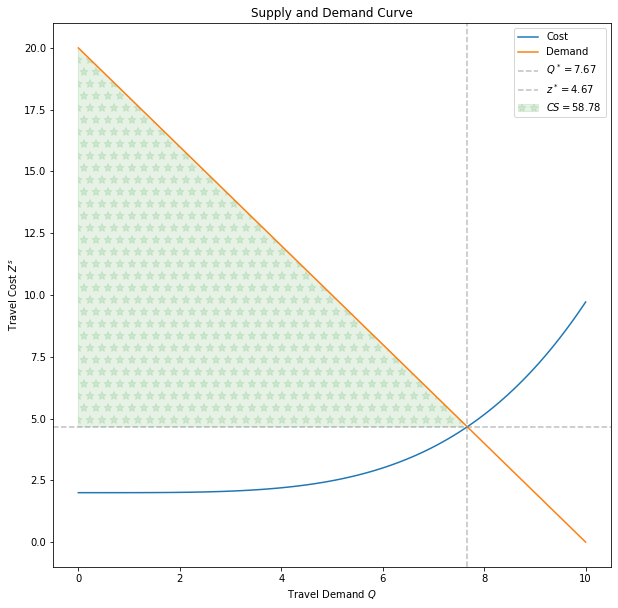

In [256]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Qs,Ps,label="Cost")
plt.plot(Qs,Ds,label="Demand")
ax.set_xlabel("Travel Demand $Q$")
ax.set_ylabel("Travel Cost $Z^s$")
ax.set_title("Supply and Demand Curve")
ax.axvline(res.root,ls="--",color="grey",alpha=0.5,label=f"$Q^*={res.root:,.2f}$")
ax.axhline(Z(res.root),ls="--",color="grey",alpha=0.5,label=f"$z^*={Z(res.root):,.2f}$")
ax.fill_between(Qs,Z(res.root),Ds,where=Qs<res.root,alpha=0.1,hatch="*",color="green",label=f"$CS={cs:,.2f}$")
ax.legend()

In [257]:
# confirm the consumer surplus, which for linear is q^2/2β
np.power(res.root,2)/(2*β)

58.78187002744739

# Question: what about the area below the price?  Does that count as producer surplus?  What is the analogy?

### Untolled equilibrium

#### (a) If the toll is zero, what is the equilibrium traffic flow $Q$ and user cost $z$?

In [258]:
print(f"Q*={res.root:,.2f}, z*=${Z(res.root):,.2f}")

Q*=7.67, z*=$4.67


#### (b) What is consumer surplus without a toll?

In [259]:
print(f"CS={cs:,.2f}")

CS=58.78


### Social Optimum

#### (c) Write an expression for marginal social cost as a function of $Q$.

Per the lecture slides,

$$TSC(Q)=Q*Z^s(Q)$$

and

$$MSC(Q)=\frac{\delta TSC}{\delta Q} = Z^s(Q) + Q \frac{\delta Z^s(Q)}{\delta Q}$$

$$\frac{\delta Z^s(Q)}{\delta Q} = \frac{4 \mu Q^3 t_f}{\gamma^4}$$

$$\therefore MSC(Q) = z_0+\mu t_f[1+(\frac{Q}{\gamma})^4] + \frac{4 \mu Q^4 t_f}{\gamma^4}$$

In [260]:
def MSC(q,z_0=z_0,μ=μ,γ=γ,t_f=t_f):
    msc = Z(q) + 4.0 * μ * np.power(q,4) * t_f / np.power(γ,4)
    return msc

In [261]:
MSCs = [MSC(q) for q in Qs]

In [262]:
f2 = lambda q: Qinverse(q) - MSC(q)
res2 = root_scalar(f2,x0=6.0,bracket=(5.5,7.0))
print(res2.root)

6.1822067900301505


In [263]:
CS_new = np.power(res2.root,2)/(2*β)

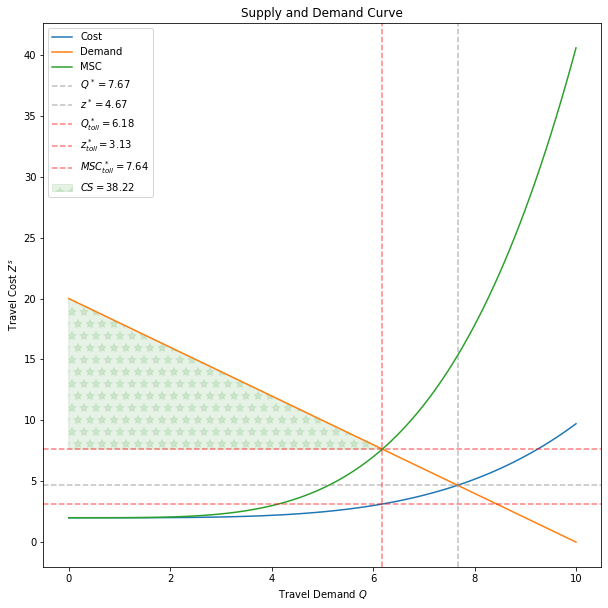

In [264]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Qs,Ps,label="Cost")
plt.plot(Qs,Ds,label="Demand")
plt.plot(Qs,MSCs,label="MSC")
ax.set_xlabel("Travel Demand $Q$")
ax.set_ylabel("Travel Cost $Z^s$")
ax.set_title("Supply and Demand Curve")
ax.axvline(res.root,ls="--",color="grey",alpha=0.5,label=f"$Q^*={res.root:,.2f}$")
ax.axhline(Z(res.root),ls="--",color="grey",alpha=0.5,label=f"$z^*={Z(res.root):,.2f}$")
ax.axvline(res2.root,ls="--",color="red",alpha=0.5,label=f"$Q_{{toll}}^*={res2.root:,.2f}$")
ax.axhline(Z(res2.root),ls="--",color="red",alpha=0.5,label=f"$z_{{toll}}^*={Z(res2.root):,.2f}$")
ax.axhline(MSC(res2.root),ls="--",color="red",alpha=0.5,label=f"$MSC_{{toll}}^*={MSC(res2.root):,.2f}$")
ax.fill_between(Qs,MSC(res2.root),Ds,where=Qs<res2.root,alpha=0.1,hatch="*",color="green",label=f"$CS={CS_new:,.2f}$")
ax.legend()

#### (d) What is the welfare-maximizing toll level?

In [265]:
τ = Qinverse(res2.root)-Qinverse(res.root)

In [266]:
print(f"Wellfare maximizing toll is ${τ:,.2f} with a travel demand of {res2.root:,.2f}")

Wellfare maximizing toll is $2.97 with a travel demand of 6.18


#### (e) Given the welfare-maximizing toll, calculate

##### i. Consumer Surplus

In [267]:
print(f"The new consumer surplus is ${CS_new:,.2f}")

The new consumer surplus is $38.22


##### ii. Total toll revenue

In [268]:
print(f"Total toll revenue = ${τ*res2.root:,.2f}")

Total toll revenue = $18.36


### Revenue Maximization

#### (f) What is the revenue-maximizing toll?

Recall that the revenue of a toll $\tau$ is simply the demand at the new price multiplied by $\tau$ where the new demand is calcualted shifted by $\tau$ 

Step 1: for a given toll $\tau$, calculate the demand

$$Q(z)=\alpha-\beta (z+\tau)$$

In [269]:
def Q_with_τ(z,τ,α=α,β=β):
    q = α - β * (z+τ)
    return q

In [270]:
def Z_with_τ(q,τ,z_0=z_0,μ=μ,t_f=t_f,γ=γ):
    z = z_0 + μ * t_f * (1+np.power(q/γ,4)) + τ
    return z

In [300]:
τ_candidates = np.linspace(0,15,10000)

In [307]:
root_candidates = []
revenue_candidates = []
maxRevenue = 0.0
tollProvidingMaxRevenue = 0.0
demandAtMaxRevenue = 0.0
for τ_candidate in τ_candidates:
    f_candidate = lambda q: Qinverse(q) - Z_with_τ(q,τ_candidate)
    res_candidate = root_scalar(f_candidate,x0=5,bracket=(0,10))
    root_candidates.append(res_candidate.root)
    revenue_candidate = res_candidate.root * τ_candidate
    if revenue_candidate > maxRevenue:
        maxRevenue = revenue_candidate
        tollProvidingMaxRevenue = τ_candidate
        demandAtMaxRevenue = res_candidate.root
    revenue_candidates.append(revenue_candidate)

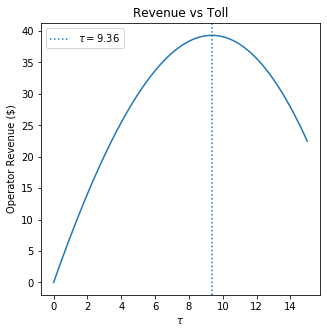

In [308]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(τ_candidates,revenue_candidates)
ax.set_xlabel("$τ$")
ax.set_ylabel("Operator Revenue ($)")
ax.set_title("Revenue vs Toll")
ax.axvline(tollProvidingMaxRevenue,ls=":",label=f"$τ={tollProvidingMaxRevenue:,.2f}$")
ax.legend()

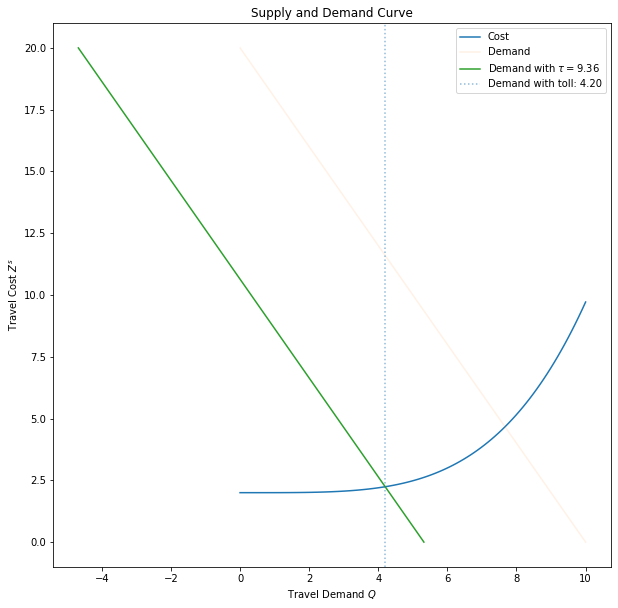

In [312]:
Qs_with_τ = [Q_with_τ(z,tollProvidingMaxRevenue) for z in zs]

fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Qs,Ps,label="Cost")
plt.plot(Qs,Ds,label="Demand",alpha=0.1)
plt.plot(Qs_with_τ,zs,label=f"Demand with $τ={tollProvidingMaxRevenue:,.2f}$")
ax.set_xlabel("Travel Demand $Q$")
ax.set_ylabel("Travel Cost $Z^s$")
ax.set_title("Supply and Demand Curve")
ax.axvline(demandAtMaxRevenue,ls=":",alpha=0.5,label=f"Demand with toll: {demandAtMaxRevenue:,.2f}")
ax.legend()

#### (g) Given the revenue maximizing toll, calculate

##### i. Consumer surplus

In [313]:
CS_new = np.power(demandAtMaxRevenue,2)/(2*β)

In [316]:
print(f"The new consumer surplus is ${CS_new:,.2f}")

The new consumer surplus is $17.64


##### ii. Total toll revenue

In [317]:
print(f"The total toll revenue is ${maxRevenue:,.2f}")

The total toll revenue is $39.31


### Queuing

Supposed that there is a bottleneck with capacity 7 at the upstream entrance to the highway.

$$7 = Q(z)=\alpha-\beta z$$

$α=10.0, β=0.5$

$$\therefore 7 = 10.0-0.5 z$$

$$\therefore z = 6$$

In [123]:
def Z_queue(q,z_0=z_0,μ=μ,t_f=t_f,γ=γ,queue=7):
    if q < queue:
        z = z_0 + μ * t_f * (1+np.power(q/γ,4))
    else:
        z = 40 # a large number
    return z

In [124]:
Ps_queue = [Z_queue(q) for q in Qs]

In [148]:
# find the intersection
# f3 = lambda q: Qinverse(q) - Z_queue(q)
f3 = lambda q: Qinverse(q) - 7
res3 = root_scalar(f3,x0=7,bracket=(6,7.5))
print(res3.root)

6.5


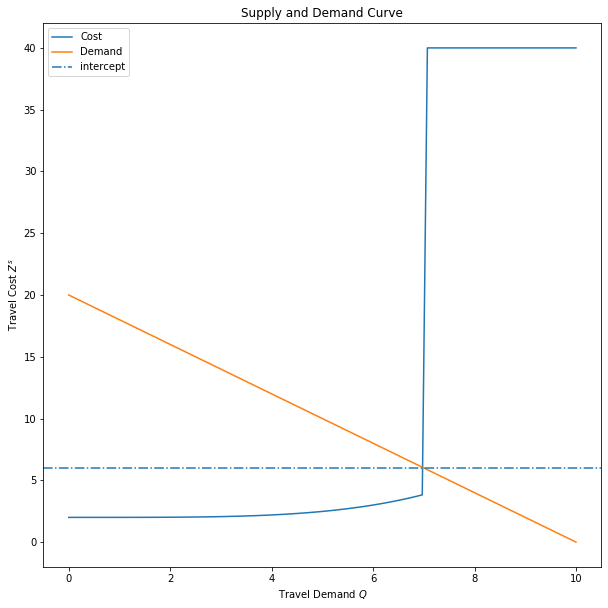

In [180]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Qs,Ps_queue,label="Cost")
plt.plot(Qs,Ds,label="Demand")
# plt.plot(Qs,MSCs,label="MSC")
ax.set_xlabel("Travel Demand $Q$")
ax.set_ylabel("Travel Cost $Z^s$")
ax.set_title("Supply and Demand Curve")
# ax.axhline(res3.root,label="intercept")
ax.axhline(6,label="intercept",ls="-.")
ax.legend()

#### (h) In equilibrium, how much time do vehicles spend queueing?

Approach

Per the course notes, go from cost to time to vehicle count

In [187]:
cost_queueing = (Qinverse(7) - Z(7)) * 7

In [189]:
cost_queueing

15.031635802469133

In [192]:
time_queueing = cost_queueing / μ

In [193]:
time_queueing

30.063271604938265

The number of vehicles in the queue is now approximately equal to time in queue divided by $Q_0$, the highway capaicty

In [194]:
vehicles_in_queue = time_queueing / 7

In [195]:
vehicles_in_queue

4.294753086419752

#### (i) What toll would eliminate queueing?

In [197]:
τ_queueing = Qinverse(7) - Z(7)

In [203]:
print(f"The toll which eliminates queueing is {τ_queueing:,.2f}")

The toll which eliminates queueing is 2.15


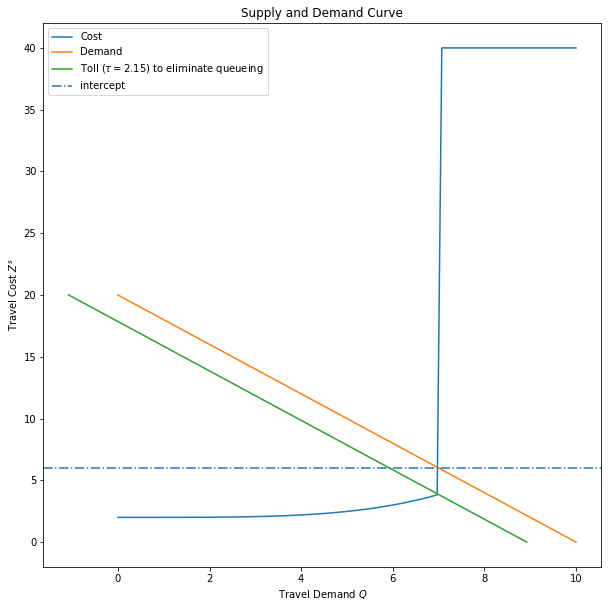

In [204]:
Qs_with_τ_queueing = [Q(z+τ_queueing) for z in zs]
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Qs,Ps_queue,label="Cost")
plt.plot(Qs,Ds,label="Demand")
plt.plot(Qs_with_τ_queueing,zs,label=f"Toll ($τ={τ_queueing:,.2f}$) to eliminate queueing")
# plt.plot(Qs,MSCs,label="MSC")
ax.set_xlabel("Travel Demand $Q$")
ax.set_ylabel("Travel Cost $Z^s$")
ax.set_title("Supply and Demand Curve")
# ax.axhline(res3.root,label="intercept")
ax.axhline(6,label="intercept",ls="-.")
ax.legend()